In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
df = sns.load_dataset('iris')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
df.duplicated().sum()

1

In [28]:
df.drop_duplicates(inplace=True)

In [41]:
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

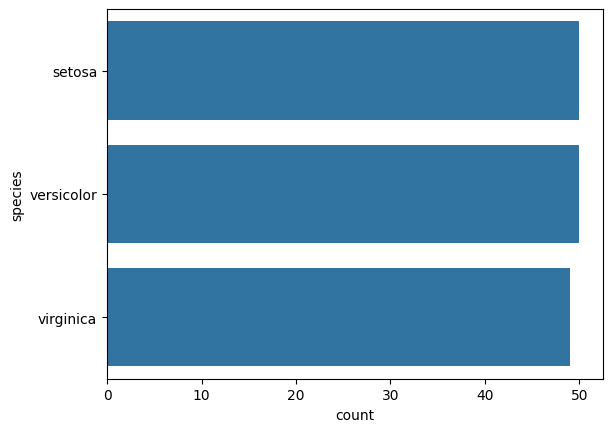

In [40]:
sns.countplot(df['species'])
plt.show()

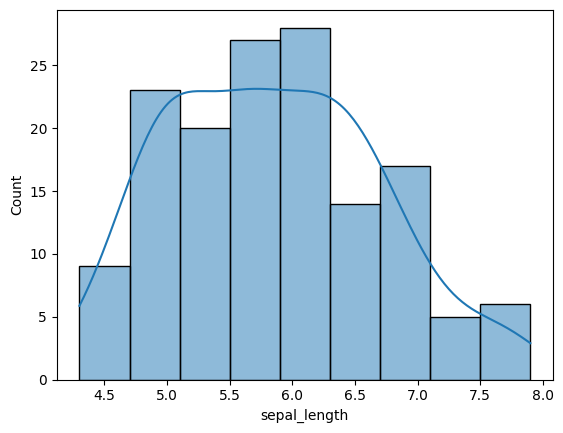

In [29]:
sns.histplot(df['sepal_length'],kde=True)
plt.show()

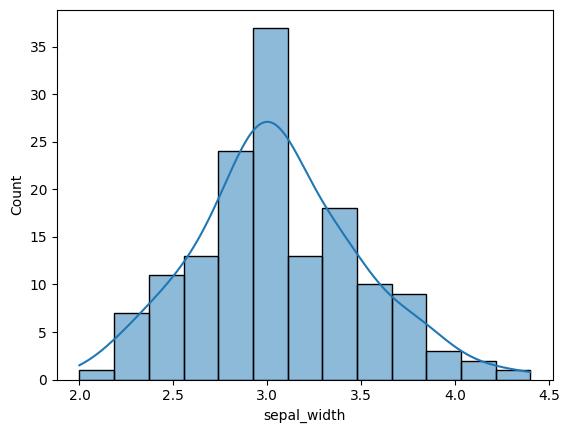

In [30]:
sns.histplot(df['sepal_width'],kde=True)
plt.show()

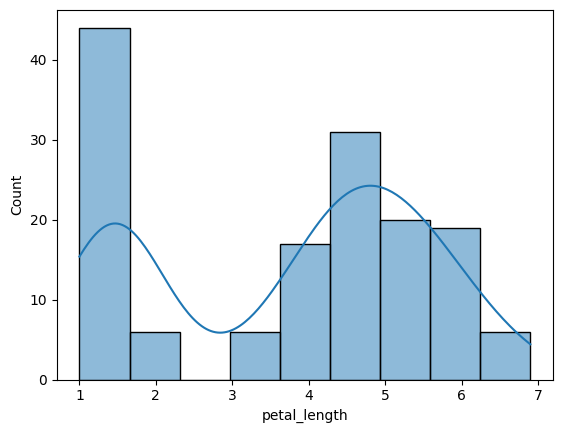

In [31]:
sns.histplot(df['petal_length'],kde=True)
plt.show()

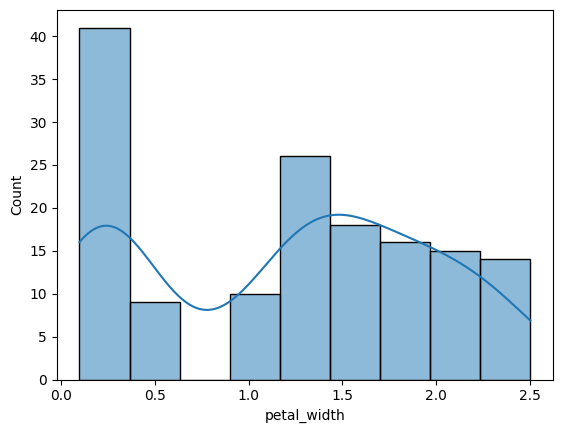

In [32]:
sns.histplot(df['petal_width'],kde=True)
plt.show()

In [42]:
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [43]:
s = []
for i in df['species']:
    if i == 'setosa':
        s.append(1)
    elif i == 'versicolor':
        s.append(2)
    else:
        s.append(3)
df['species'] = s

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [45]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
species,0.786971,-0.422987,0.949402,0.956514,1.000000


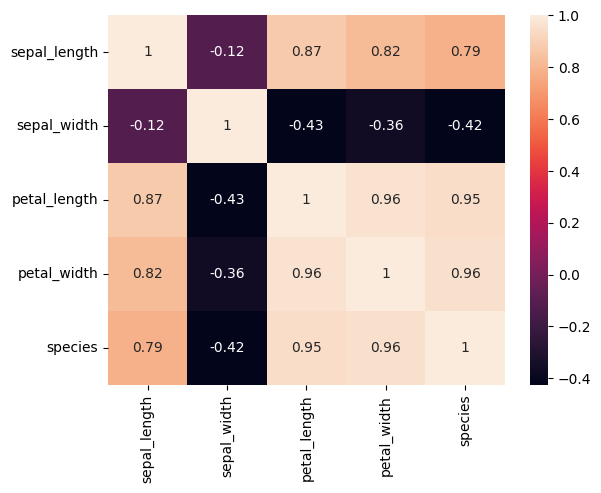

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.show()

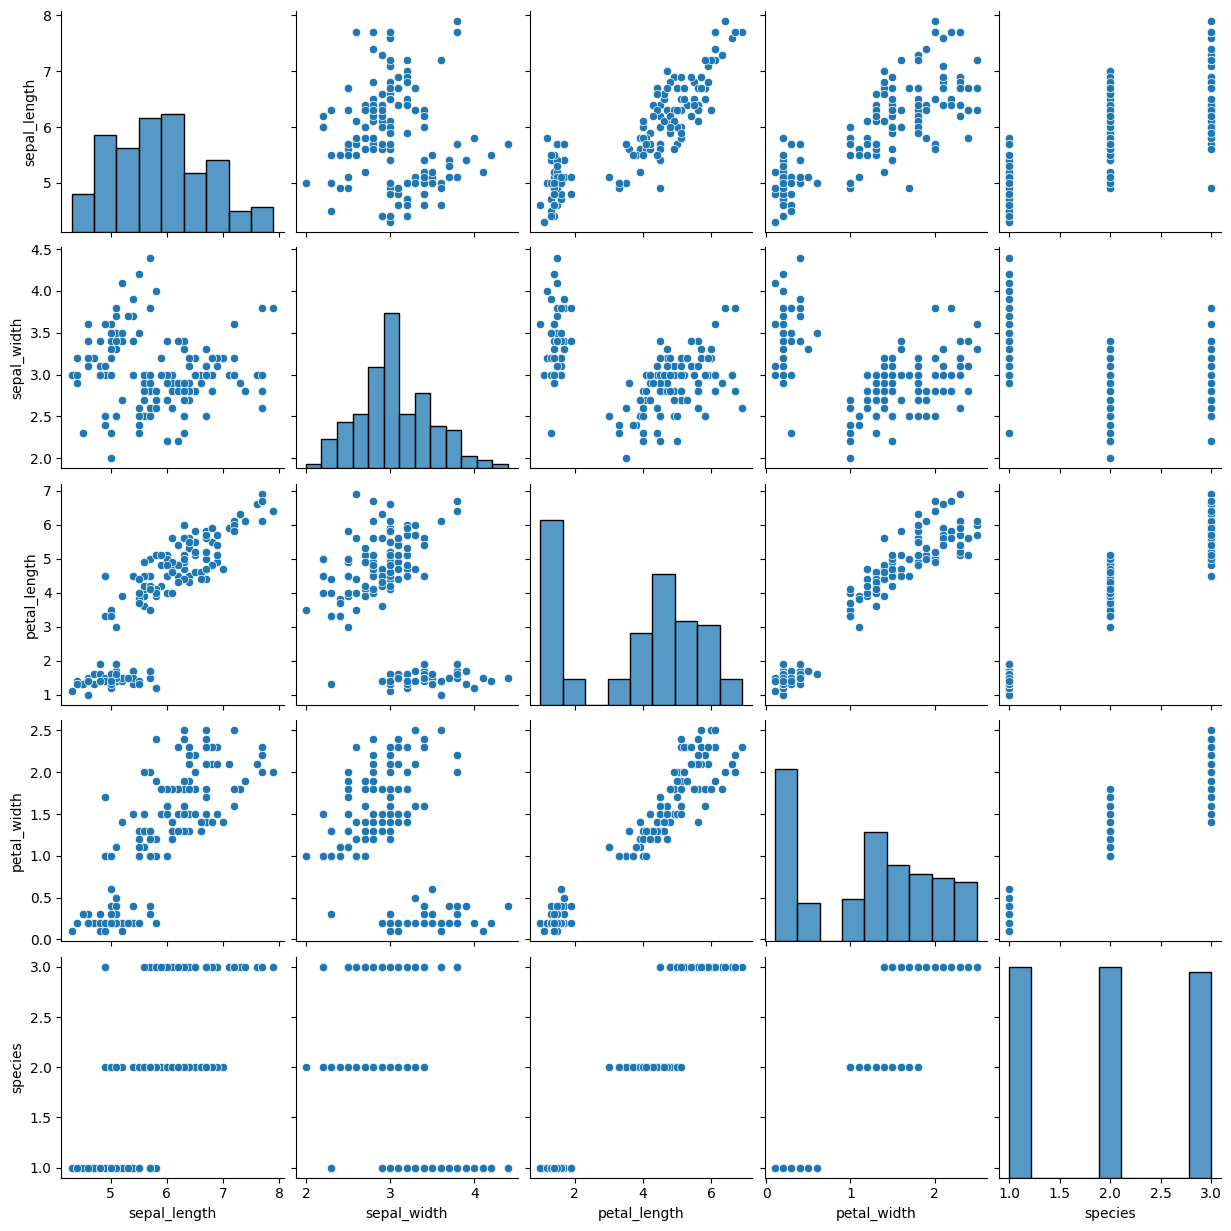

In [48]:
sns.pairplot(df)
plt.show()

In [49]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [51]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [57]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
19,5.1,3.8,1.5,0.3
141,6.9,3.1,5.1,2.3
92,5.8,2.6,4.0,1.2
123,6.3,2.7,4.9,1.8
130,7.4,2.8,6.1,1.9
...,...,...,...,...
53,5.5,2.3,4.0,1.3
65,6.7,3.1,4.4,1.4
39,5.1,3.4,1.5,0.2
124,6.7,3.3,5.7,2.1


In [58]:
y_train

,species
19,1
141,3
92,2
123,3
130,3
...,...
53,2
65,2
39,1
124,3


In [59]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
56,6.3,3.3,4.7,1.6
14,5.8,4.0,1.2,0.2
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
51,6.4,3.2,4.5,1.5
40,5.0,3.5,1.3,0.3
136,6.3,3.4,5.6,2.4
108,6.7,2.5,5.8,1.8


In [60]:
y_test

,species
56,2
14,1
82,2
134,3
11,1
12,1
51,2
40,1
136,3
108,3


In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(x_test)

In [67]:
r2_score(y_test,y_pred)*100

93.29054724033476